## Assignment 1

1)Suppose that the data mining task is to cluster the following eight points (with (x, y) representing location) into three clusters:

A1(2, 10), A2(2, 5), A3(8, 4), B1(5, 8), B2(7, 5), B3(6, 4), C1(1, 2), C2(4, 9):

The distance function is Euclidean distance. Suppose initially we assign A1, B1, and C1 as the center of each cluster, respectively. Use the k-means algorithm to show only

(a) The three cluster centers after the first round execution

(b) The final three clusters

In [1]:
# import libraries for data store and graph plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

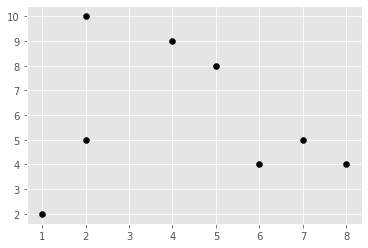

In [2]:
# create the input data
X = np.array([[2,10],
              [2,5],
              [8,4],
              [5,8],
              [7,5],
              [6,4],
              [1,2],
              [4,9]])

# plot current input data
plt.scatter(X[:,0], X[:,1], c='black')
plt.show()

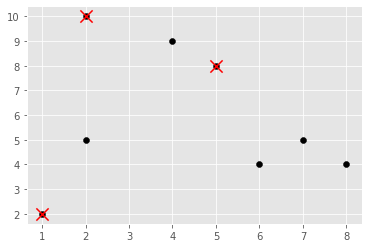

In [3]:
# create the input data
X = np.array([[2,10],
              [2,5],
              [8,4],
              [5,8],
              [7,5],
              [6,4],
              [1,2],
              [4,9]])

centroids = np.array([[2,10],
              [5,8],
              [1,2]])

# plot current input data with centroids
plt.scatter(X[:,0], X[:,1], c='black')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=150, marker='x')
plt.show()

In [4]:
class KMeans:
    def __init__(self, k=3, tolerance=0, max_iterations=500):
        self.k = k # no. of clusters
        self.tolerance = tolerance # tolerance set to 0. Small dataset
        self.max_iterations = max_iterations # no. of times the code will run
    
    def calc_distance(self, X1, X2):
        # calculate euclidean distance
        return (sum((X1 - X2)**2))**0.5
    
    def fit(self, data, centroids):
        self.centroids = {}
        # initialize the centroids, using the provided input
        for i in range(self.k):
            self.centroids[i] = centroids[i]
            
        # begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
                
            # find the distance between the point and the cluster
            # choose the nearest centroid
            for features in data:
                distances = [self.calc_distance(features, self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                
            previous = dict(self.centroids)
            
            # take the average of the cluster datapoints
            # recalculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis=0)
                
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            # break out of the main loop if the results are optimal
            # ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break
               

In [5]:
def plot_graph(km):
    colors = 10*["r", "g", "c", "b", "k"]
    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=130, marker='x')
    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color=color, s=30)
    plt.show()

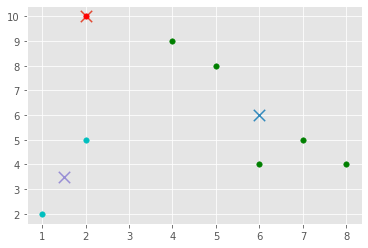

[ 2. 10.]
[6. 6.]
[1.5 3.5]


In [6]:
# solves (a) run for only one iteration
km = KMeans(3,0,1)
centroids = np.array([[2,10],
              [5,8],
              [1,2]])
km.fit(X, centroids)

plot_graph(km)
for centroid in km.centroids:
    print(km.centroids[centroid])

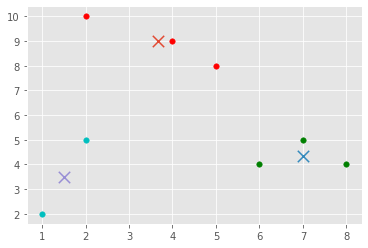

[3.66666667 9.        ]
[7.         4.33333333]
[1.5 3.5]


In [7]:
# solves (b)
km = KMeans(3)
centroids = np.array([[2,10],
              [5,8],
              [1,2]])
km.fit(X, centroids)

plot_graph(km)
for centroid in km.centroids:
    print(km.centroids[centroid])